In [28]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [118]:
# generate data
M = 10000
xy = np.random.multivariate_normal([0.,0.], [[1.,0.],[0.,1.0]], M)
xy = xy[np.argsort(xy[:,0])]
x, y = xy[:,0], xy[:,1]
X = x
fnT = lambda x: 1 + x + x**2
#fnT = lambda x: 1 + x
Y = y + fnT(x)

# conditional expectation estimate using lowess
XY_s = sm.nonparametric.lowess(Y,X, frac=0.1)

In [119]:
# linear projections (basically, linear regression)
Xm = np.reshape(X, (-1,1))
# 1. without constant
model_woc = sm.OLS(Y,Xm)
model_woc_res = model_woc.fit()
Y_lpwoc = model_woc_res.predict(Xm)
# 2. with constant
Xwc = sm.add_constant(Xm)
model_wc = sm.OLS(Y,Xwc)
model_wc_res = model_wc.fit()
Y_lpwc = model_wc_res.predict(Xwc)

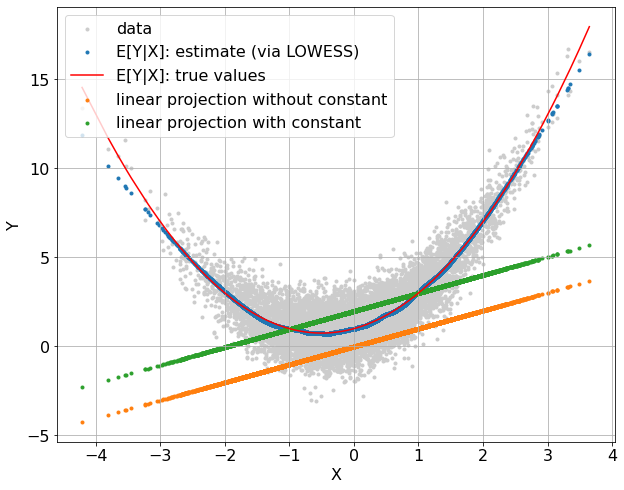

In [120]:
# plot
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(10,8))
plt.scatter(X, Y, marker='.', color = 0.8 * np.ones(3), label='data')
plt.scatter(XY_s[:,0], XY_s[:,1], marker='.', label='E[Y|X]: estimate (via LOWESS)')
plt.plot(X, fnT(X), 'r', label='E[Y|X]: true values')
plt.scatter(X, Y_lpwoc, marker='.', label='linear projection without constant')
plt.scatter(X, Y_lpwc, marker='.', label = 'linear projection with constant')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=2)
plt.grid()
plt.show()